# Importing API

In [6]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '79699383-4185-4fd8-8e95-c5c92df1ce54',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  # print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [7]:
type(data)

dict

# Setting Display options

In [8]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Normalizing json data and storing in dataframe

In [9]:
df=pd.json_normalize(data['data'])

In [10]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11946,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.982595e+07,1.982595e+07,False,NaN,1,NaN,NaN,None,2025-02-18T11:54:00.000Z,95625.555681,2.829068e+10,30.2133,-0.102796,-0.447085,-2.631301,-8.296373,2.891984,2.120768,1.895867e+12,60.2250,2.008137e+12,None,2025-02-18T11:54:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,9933,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205568e+08,1.205568e+08,True,NaN,2,NaN,NaN,None,2025-02-18T11:53:00.000Z,2683.471937,2.470842e+10,61.1405,-0.474722,-2.503903,-0.907271,-14.442711,-14.045265,-13.644107,3.235107e+11,10.2792,3.235107e+11,None,2025-02-18T11:53:00.000Z,NaN,NaN,NaN,NaN,NaN
2,52,XRP,XRP,xrp,1534,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.781886e+10,9.998645e+10,False,NaN,3,NaN,NaN,None,2025-02-18T11:53:00.000Z,2.575763,4.793061e+09,13.4582,-0.726298,-3.526854,3.331886,-15.773303,29.828038,128.492362,1.489277e+11,4.7309,2.575763e+11,None,2025-02-18T11:53:00.000Z,NaN,NaN,NaN,NaN,NaN
3,825,Tether USDt,USDT,tether,117029,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.417624e+11,1.435668e+11,True,NaN,4,NaN,NaN,None,2025-02-18T11:53:00.000Z,0.999605,7.598499e+10,31.5952,-0.026960,-0.042420,-0.053017,0.115654,0.086940,-0.138297,1.417065e+11,4.5026,1.435102e+11,None,2025-02-18T11:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
4,1839,BNB,BNB,bnb,2366,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424773e+08,1.424773e+08,False,NaN,5,NaN,NaN,None,2025-02-18T11:54:00.000Z,654.950997,1.966269e+09,-2.8442,0.013770,-1.931195,1.673426,-3.954212,5.093096,6.791728,9.331563e+10,2.9643,9.331563e+10,None,2025-02-18T11:54:00.000Z,NaN,NaN,NaN,NaN,NaN


# Datetime formatting

In [11]:
pd.to_datetime('now').strftime('%H:%M:%S')

'17:25:58'

In [12]:
df['timestamp']=pd.to_datetime('now')

In [13]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11946,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.982595e+07,1.982595e+07,False,NaN,1,NaN,NaN,None,2025-02-18T11:54:00.000Z,95625.555681,2.829068e+10,30.2133,-0.102796,-0.447085,-2.631301,-8.296373,2.891984,2.120768,1.895867e+12,60.2250,2.008137e+12,None,2025-02-18T11:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-18 17:25:58.973315
1,1027,Ethereum,ETH,ethereum,9933,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205568e+08,1.205568e+08,True,NaN,2,NaN,NaN,None,2025-02-18T11:53:00.000Z,2683.471937,2.470842e+10,61.1405,-0.474722,-2.503903,-0.907271,-14.442711,-14.045265,-13.644107,3.235107e+11,10.2792,3.235107e+11,None,2025-02-18T11:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-18 17:25:58.973315
2,52,XRP,XRP,xrp,1534,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.781886e+10,9.998645e+10,False,NaN,3,NaN,NaN,None,2025-02-18T11:53:00.000Z,2.575763,4.793061e+09,13.4582,-0.726298,-3.526854,3.331886,-15.773303,29.828038,128.492362,1.489277e+11,4.7309,2.575763e+11,None,2025-02-18T11:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-18 17:25:58.973315
3,825,Tether USDt,USDT,tether,117029,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.417624e+11,1.435668e+11,True,NaN,4,NaN,NaN,None,2025-02-18T11:53:00.000Z,0.999605,7.598499e+10,31.5952,-0.026960,-0.042420,-0.053017,0.115654,0.086940,-0.138297,1.417065e+11,4.5026,1.435102e+11,None,2025-02-18T11:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-18 17:25:58.973315
4,1839,BNB,BNB,bnb,2366,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424773e+08,1.424773e+08,False,NaN,5,NaN,NaN,None,2025-02-18T11:54:00.000Z,654.950997,1.966269e+09,-2.8442,0.013770,-1.931195,1.673426,-3.954212,5.093096,6.791728,9.331563e+10,2.9643,9.331563e+10,None,2025-02-18T11:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-18 17:25:58.973315


# Main Function

In [14]:
def api_runner():
    
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '79699383-4185-4fd8-8e95-c5c92df1ce54',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df=pd.json_normalize(data['data'])
    df['timestamp']=pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\User\Desktop\YASH\DA Portfolio Projects\Project-Unrelated\Python\API.csv'):
        df.to_csv(r'C:\Users\User\Desktop\YASH\DA Portfolio Projects\Project-Unrelated\Python\API.csv', header='column_names', index=False)
    else:
        df.to_csv(r'C:\Users\User\Desktop\YASH\DA Portfolio Projects\Project-Unrelated\Python\API.csv', mode='a', header=False, index=False)
        






In [15]:
import os
from time import time
from time import sleep

In [16]:
# We can only cal API for 333 times a day
# Timmer set to 60sec so it'll collect data every 60sec 
for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [17]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11946,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.982595e+07,1.982595e+07,False,NaN,1,NaN,NaN,None,2025-02-18T11:54:00.000Z,95625.555681,2.829068e+10,30.2133,-0.102796,-0.447085,-2.631301,-8.296373,2.891984,2.120768,1.895867e+12,60.2250,2.008137e+12,None,2025-02-18T11:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-18 17:25:58.973315
1,1027,Ethereum,ETH,ethereum,9933,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205568e+08,1.205568e+08,True,NaN,2,NaN,NaN,None,2025-02-18T11:53:00.000Z,2683.471937,2.470842e+10,61.1405,-0.474722,-2.503903,-0.907271,-14.442711,-14.045265,-13.644107,3.235107e+11,10.2792,3.235107e+11,None,2025-02-18T11:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-18 17:25:58.973315
2,52,XRP,XRP,xrp,1534,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.781886e+10,9.998645e+10,False,NaN,3,NaN,NaN,None,2025-02-18T11:53:00.000Z,2.575763,4.793061e+09,13.4582,-0.726298,-3.526854,3.331886,-15.773303,29.828038,128.492362,1.489277e+11,4.7309,2.575763e+11,None,2025-02-18T11:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-18 17:25:58.973315
3,825,Tether USDt,USDT,tether,117029,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.417624e+11,1.435668e+11,True,NaN,4,NaN,NaN,None,2025-02-18T11:53:00.000Z,0.999605,7.598499e+10,31.5952,-0.026960,-0.042420,-0.053017,0.115654,0.086940,-0.138297,1.417065e+11,4.5026,1.435102e+11,None,2025-02-18T11:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-18 17:25:58.973315
4,1839,BNB,BNB,bnb,2366,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424773e+08,1.424773e+08,False,NaN,5,NaN,NaN,None,2025-02-18T11:54:00.000Z,654.950997,1.966269e+09,-2.8442,0.013770,-1.931195,1.673426,-3.954212,5.093096,6.791728,9.331563e+10,2.9643,9.331563e+10,None,2025-02-18T11:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-18 17:25:58.973315


# Exploring and Extracting Data

In [18]:
df_2=pd.read_csv(r"C:\Users\User\Desktop\YASH\DA Portfolio Projects\Project-Unrelated\Python\API.csv")

In [20]:
df_2.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11929,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.982232e+07,1.982232e+07,False,NaN,1,NaN,NaN,NaN,2025-02-10T09:55:00.000Z,97525.660820,3.814622e+10,78.9272,-0.204652,0.536736,2.028489,3.486442,-3.416983,10.822610,1.933185e+12,60.7098,2.048039e+12,NaN,2025-02-10T09:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 15:26:39.528398
1,1027,Ethereum,ETH,ethereum,9921,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.205382e+08,1.205382e+08,True,NaN,2,NaN,NaN,NaN,2025-02-10T09:55:00.000Z,2647.927291,2.002751e+10,39.8416,0.122906,-0.470815,2.767476,-18.210704,-32.642511,-21.384510,3.191764e+11,10.0234,3.191764e+11,NaN,2025-02-10T09:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 15:26:39.528398
2,825,Tether USDt,USDT,tether,115977,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.416185e+11,1.435706e+11,True,NaN,3,NaN,NaN,NaN,2025-02-10T09:55:00.000Z,1.000197,8.075222e+10,38.4824,0.002889,-0.007731,-0.068575,0.034303,0.000903,-0.071160,1.416463e+11,4.4478,1.435988e+11,NaN,2025-02-10T09:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-10 15:26:39.528398
3,52,XRP,XRP,xrp,1526,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.776255e+10,9.998650e+10,False,NaN,4,NaN,NaN,NaN,2025-02-10T09:55:00.000Z,2.429117,5.585925e+09,41.8599,-0.438825,-1.757448,1.751129,3.266418,0.013178,266.400686,1.403120e+11,4.4064,2.429117e+11,NaN,2025-02-10T09:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 15:26:39.528398
4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.879187e+08,5.937997e+08,True,NaN,5,NaN,NaN,NaN,2025-02-10T09:55:00.000Z,204.879433,3.980819e+09,40.2800,-0.176716,1.392793,5.240710,10.892115,-11.864595,-5.847466,9.996451e+10,3.1393,1.216574e+11,NaN,2025-02-10T09:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-10 15:26:39.528398


In [21]:
lst=list(df_2.iloc[0:0, 20:26])

In [22]:
lst

['quote.USD.percent_change_1h',
 'quote.USD.percent_change_24h',
 'quote.USD.percent_change_7d',
 'quote.USD.percent_change_30d',
 'quote.USD.percent_change_60d',
 'quote.USD.percent_change_90d']

In [23]:
df3=df_2.groupby('name', sort=False)[lst].mean()

In [24]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [25]:
df4=df3.stack()

In [26]:
df5=df4.to_frame(name='values')

In [27]:
df6=df5.reset_index()

In [28]:
df7=df6.rename(columns={'level_1':'percent_change'})

In [41]:
df7.head()

,name,percent_change,values
0,Bitcoin,1h,-0.12808
1,Bitcoin,24h,0.26803
2,Bitcoin,7d,0.59337
3,Bitcoin,30d,-0.41474
4,Bitcoin,60d,-1.26191


In [32]:
df7['percent_change']=df7['percent_change'].replace(lst,['1h', '24h', '7d', '30d', '60d', '90d'])

In [33]:
df7.head()

,name,percent_change,values
0,Bitcoin,1h,-0.12808
1,Bitcoin,24h,0.26803
2,Bitcoin,7d,0.59337
3,Bitcoin,30d,-0.41474
4,Bitcoin,60d,-1.26191


# Catplot, lineplot

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

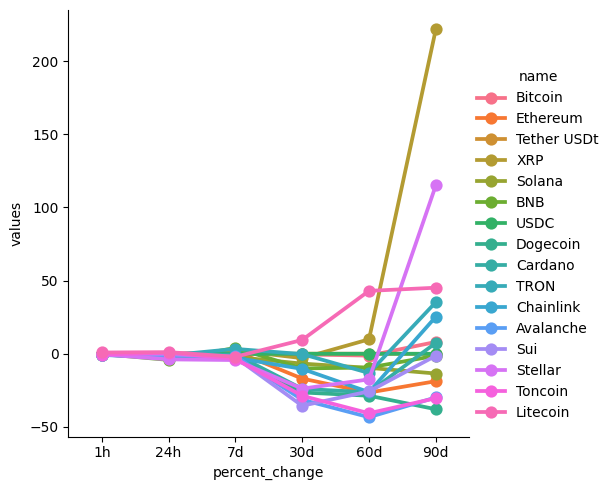

In [35]:
sns.catplot(x='percent_change', y='values', hue='name', kind='point', data=df7)

In [38]:
df10=df_2[['name', 'quote.USD.price', 'timestamp']]
df10=df10.query("name=='Bitcoin'")

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '2025-02-10 15:26:39.528398'),
  Text(1, 0, '2025-02-10 15:27:40.286952'),
  Text(2, 0, '2025-02-10 15:28:40.690730'),
  Text(3, 0, '2025-02-10 15:29:41.111100'),
  Text(4, 0, '2025-02-18 17:26:12.805861'),
  Text(5, 0, '2025-02-18 17:27:13.170879')])

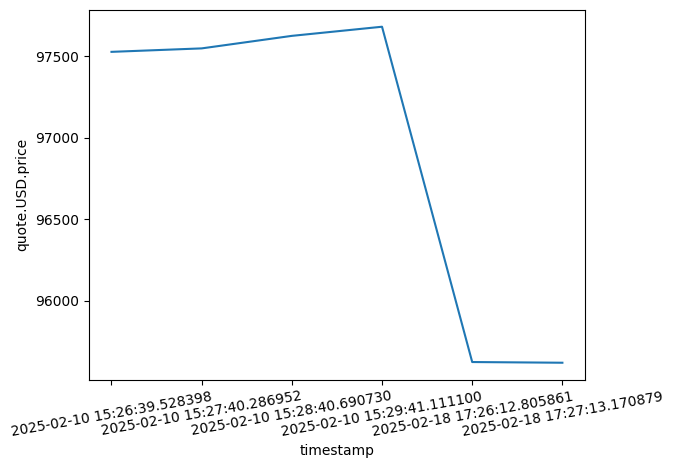

In [39]:
fig,ax = plt.subplots()
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)
# plt.tight_layout()
plt.xticks(rotation=10)
